1. Dans cette première partie, on charge toute les données et on vérifie la forme 

In [36]:
import numpy as np


data = np.loadtxt("input_k_vectors.dat")

print("Shape:", data.shape)  
print(data[:5])


Shape: (15625, 3)
[[276.46015352  75.39822369 238.76104167]
 [175.9291886   50.26548246 201.06192983]
 [188.49555922  25.13274123  87.9645943 ]
 [ 87.9645943  113.09733553 301.59289474]
 [251.32741229 138.23007676 213.62830044]]


2. On trie les vecteur en faisant la norme et en triant dans l'ordre croissant (algorithme d'insertion sort). Puis, on peut s'assurer qu'elles soient triées (dernière ligne de la cellule ci-dessous).

In [37]:
def insertion_ranking(data):

    sorted_data = data.copy()
    norms = np.linalg.norm(sorted_data, axis=1)

    for i in range(1, len(norms)):
        key_norm = norms[i]
        key_vec = sorted_data[i].copy()
        j = i - 1

        while j >= 0 and norms[j] > key_norm:
            norms[j + 1] = norms[j]
            sorted_data[j + 1] = sorted_data[j]
            j -= 1

        norms[j + 1] = key_norm
        sorted_data[j + 1] = key_vec

    return sorted_data
sorted_data = insertion_ranking(data)
norms = np.linalg.norm(sorted_data, axis=1)
is_sorted = np.all(norms[:-1] <= norms[1:])
print("Données triées:", is_sorted)  




Données triées: True


3. Ici, on fais la même chose mais avec l'algorithm bubble_ranking. Comme avant, on vérifie que ca soit bien ordonné.

In [38]:
def bubble_ranking(data):
    sorted_data = data.copy()
    n = len(sorted_data)
    norms = np.linalg.norm(sorted_data, axis=1)

    for i in range(n):
        for j in range(0, n - i - 1):
            if norms[j] > norms[j + 1]:
                norms[j], norms[j + 1] = norms[j + 1], norms[j]
                sorted_data[j], sorted_data[j + 1] = sorted_data[j + 1], sorted_data[j]
    return sorted_data
sorted_data_bubble = bubble_ranking(data)
norms_bubble = np.linalg.norm(sorted_data_bubble, axis=1)
is_sorted_bubble = np.all(norms_bubble[:-1] <= norms_bubble[1:])
print("Données triées avec bubble sort:", is_sorted_bubble)  


Données triées avec bubble sort: True


4. Dans cette partie, on chronomêtre les deux facon de trier les données pour pouvoir les comparées, avec différents points.

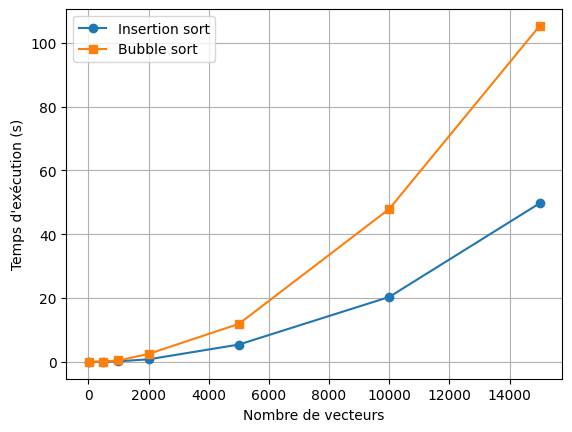

In [39]:
import time
import matplotlib.pyplot as plt

sizes = [10, 500, 1000, 2000, 5000, 10000, 15000]
times_insertion = []
times_bubble = []

for n in sizes:
    subset = data[:n]

    start = time.time()
    insertion_ranking(subset)
    times_insertion.append(time.time() - start)

    start = time.time()
    bubble_ranking(subset)
    times_bubble.append(time.time() - start)

plt.figure()
plt.plot(sizes, times_insertion, 'o-', label='Insertion sort')
plt.plot(sizes, times_bubble, 's-', label='Bubble sort')
plt.xlabel('Nombre de vecteurs')
plt.ylabel('Temps d\'exécution (s)')
plt.legend()
plt.grid(True)
plt.show()


On remarque le Bubble sort prends plus de temps que le insertion sort.

Maintenant, on copie les données et on remplaces les array par des listes. Encore une fois, on chronomêtre les deux facon de triés les données.

In [ ]:
import math
sizes = [10, 500, 1000, 2000, 5000, 10000, 15000]
def insertion_ranking_list(data):
    sorted_data = data.copy()
    norms = [np.linalg.norm(vec) for vec in sorted_data]

    for i in range(1, len(norms)):
        key_norm = norms[i]
        key_vec = sorted_data[i].copy()
        j = i - 1

        while j >= 0 and norms[j] > key_norm:
            norms[j + 1] = norms[j]
            sorted_data[j + 1] = sorted_data[j]
            j -= 1

        norms[j + 1] = key_norm
        sorted_data[j + 1] = key_vec

    return sorted_data

def bubble_ranking_list(data):
    sorted_data = data.copy()
    n = len(sorted_data)
    norms = [np.linalg.norm(vec) for vec in sorted_data]

    for i in range(n):
        for j in range(0, n - i - 1):
            if norms[j] > norms[j + 1]:
                norms[j], norms[j + 1] = norms[j + 1], norms[j]
                sorted_data[j], sorted_data[j + 1] = sorted_data[j + 1], sorted_data[j]
    return sorted_data
sizes = [10, 500, 1000, 2000, 5000, 10000, 15000]
times_insertion_list = []
times_bubble_list = []
for n in sizes:
    subset_list = data[:n]

    start = time.time()
    insertion_ranking_list(subset_list)
    times_insertion_list.append(time.time() - start)

    start = time.time()
    bubble_ranking_list(subset_list)
    times_bubble_list.append(time.time() - start)
plt.figure()
plt.plot(sizes, times_insertion_list, 'o-', label='Insertion sort (listes)')
plt.plot(sizes, times_bubble_list, 's-', label='Bubble sort (listes)')
plt.xlabel('Nombre de vecteurs')
plt.ylabel('Temps d\'exécution (s)')
plt.legend()
plt.grid(True)
plt.show()


On remarque que le bubble sort prend plus de temps que le insertion sort, comme avant, mais le temps que ça a pris est moins long en moyenne.

Juste pour s'assurer que les données sont bien sous forme de liste et non sous forme de array:

In [ ]:
type(data)

list

Dans cette dernière partie, on veut comparer la position des vecteurs en rapport avec leur norme (plus c'est haut plus la norme est grande et plus c'est a droite plus il est dans les derniers dans la liste des vecteurs). 

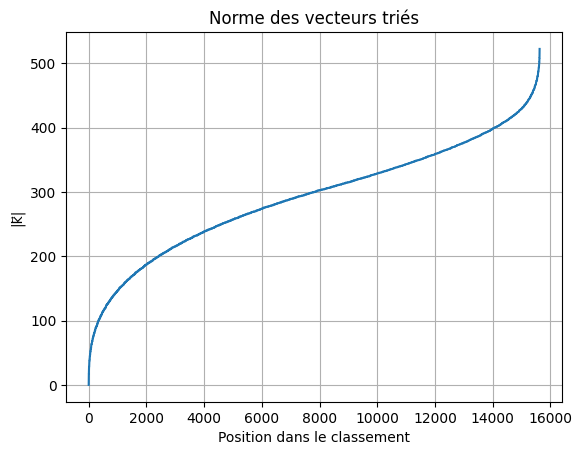

In [ ]:
sorted_data = insertion_ranking(data)
norms = np.linalg.norm(sorted_data, axis=1)

plt.figure()
plt.plot(norms)
plt.xlabel('Position dans le classement')
plt.ylabel('|k⃗|')
plt.title('Norme des vecteurs triés')
plt.grid(True)
plt.show()


On peut voir, qu'on n'as pas beaucoup de vecteur entre 0 et 100 et pas beaucoup non-plus entre 430 et 500. Plus la pente de ce graph est plate, plus la concentration de vecteur est élevé a cette endroit. 